# Getting the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

Mounted at /content/drive


In [ ]:

# TRACK CSV DATASET
tracks = pd.read_csv('/content/drive/MyDrive/Proyecto Final IA 2023-2/Entrega 2/Data/fma-rock-vs-hiphop.csv')
tracks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [ ]:
# TRACK METRICS JSON DATASET
metrics = pd.read_json('/content/drive/MyDrive/Proyecto Final IA 2023-2/Entrega 2/Data/echonest-metrics.json')
metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [ ]:
# Merge the datasets by track_id
track_metrics=pd.merge(tracks,metrics)
track_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   bit_rate          4802 non-null   int64  
 2   comments          4802 non-null   int64  
 3   composer          106 non-null    object 
 4   date_created      4802 non-null   object 
 5   date_recorded     1234 non-null   object 
 6   duration          4802 non-null   int64  
 7   favorites         4802 non-null   int64  
 8   genre_top         4802 non-null   object 
 9   genres            4802 non-null   object 
 10  genres_all        4802 non-null   object 
 11  information       334 non-null    object 
 12  interest          4802 non-null   int64  
 13  language_code     2599 non-null   object 
 14  license           4789 non-null   object 
 15  listens           4802 non-null   int64  
 16  lyricist          13 non-null     object 


In [ ]:
# Get rid of the unnecesary variables
track_metrics = track_metrics.drop(['track_id', 'bit_rate', 'comments', 'composer', 'interest', 'date_created', 'date_recorded','favorites','genres', 'genres_all', 'information', 'language_code', 'license', 'lyricist', 'number', 'publisher', 'tags'], axis=1)

track_metrics.head(1)

,duration,genre_top,listens,title,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,405,Rock,424,Hundred-Year Flood,0.988306,0.255661,0.979774,0.973006,0.121342,0.05174,90.241,0.034018


In [ ]:
#Obtain the 2000s spotify songs dataset
spotify2000data = pd.read_csv('/content/drive/MyDrive/Proyecto Final IA 2023-2/Entrega 2/Data/Spotify-2000.csv')
spotify2000data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [ ]:
# change column Top Genre to genre_top in dataset spotify2000data
spotify2000data.rename(columns={'Top Genre':'genre_top'}, inplace=True)
spotify2000data['genre_top'].value_counts().sort_values(ascending = False)

album rock              413
adult standards         123
dutch pop                88
alternative rock         86
dance pop                83
                       ... 
happy hardcore            1
australian americana      1
electro house             1
afropop                   1
bebop                     1
Name: genre_top, Length: 149, dtype: int64

In [ ]:
# rows with genre_top containing rock or hip hop
for i in range(0,len(spotify2000data)):
    if ('rock' in spotify2000data['genre_top'][i]):
        spotify2000data['genre_top'][i] = 'Rock'

    elif ('hip hop' in spotify2000data['genre_top'][i]):
        spotify2000data['genre_top'][i] = 'Hip-Hop'
    else:
        spotify2000data.drop(i, inplace=True)

<ipython-input-8-0b573c6aabc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify2000data['genre_top'][i] = 'Rock'
<ipython-input-8-0b573c6aabc7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify2000data['genre_top'][i] = 'Hip-Hop'
<ipython-input-8-0b573c6aabc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify2000data['genre_top'][i] = 'Rock'
<ipython-input-8-0b573c6aabc7>:4: SettingWithCopyWarning: 
A value is try

In [ ]:
spotify2000data['genre_top'].value_counts().sort_values(ascending = False)

Rock       857
Hip-Hop     29
Name: genre_top, dtype: int64

In [ ]:
# Get rid of the unnecesary variables in spotify2000data
spotify2000data = spotify2000data.drop(['Index', 'Artist', 'Popularity', 'Year'], axis=1)

# Change names of dataset columns to match with the original dataset in order to merge properly
spotify2000data.rename(columns={'Title':'title'}, inplace=True)
spotify2000data.rename(columns={'Beats Per Minute (BPM)':'tempo'}, inplace=True)
spotify2000data.rename(columns={'Energy':'energy'}, inplace=True)
spotify2000data.rename(columns={'Danceability':'danceability'}, inplace=True)
spotify2000data.rename(columns={'Loudness (dB)':'loudness'}, inplace=True)
spotify2000data.rename(columns={'Liveness':'liveness'}, inplace=True)
spotify2000data.rename(columns={'Valence':'valence'}, inplace=True)
spotify2000data.rename(columns={'Length (Duration)':'duration'}, inplace=True)
spotify2000data.rename(columns={'Acousticness':'acousticness'}, inplace=True)
spotify2000data.rename(columns={'Speechiness':'speechiness'}, inplace=True)

spotify2000data.head(1)

,title,genre_top,tempo,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness
1,Black Night,Rock,135,79,50,-11,17,81,207,17,7


In [ ]:
# Finally, we want to remove numbers with commas in order to make an integer conversion to keep the duration as a int64 data type
for i in spotify2000data.index:
    if (',' in spotify2000data['duration'][i]):
        spotify2000data['duration'][i] = spotify2000data['duration'][i].replace(",","")

# We apply the conversion
spotify2000data['duration'] = spotify2000data['duration'].astype(str).astype(int)

# Verify the conversion
spotify2000data.dtypes

<ipython-input-11-09a6db31a34a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify2000data['duration'][i] = spotify2000data['duration'][i].replace(",","")


title           object
genre_top       object
tempo            int64
energy           int64
danceability     int64
loudness         int64
liveness         int64
valence          int64
duration         int64
acousticness     int64
speechiness      int64
dtype: object

In [ ]:
# Concat the datasets
track_metrics=pd.concat([track_metrics,spotify2000data])
track_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5688 entries, 0 to 1991
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration          5688 non-null   int64  
 1   genre_top         5688 non-null   object 
 2   listens           4802 non-null   float64
 3   title             5688 non-null   object 
 4   acousticness      5688 non-null   float64
 5   danceability      5688 non-null   float64
 6   energy            5688 non-null   float64
 7   instrumentalness  4802 non-null   float64
 8   liveness          5688 non-null   float64
 9   speechiness       5688 non-null   float64
 10  tempo             5688 non-null   float64
 11  valence           5688 non-null   float64
 12  loudness          886 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 622.1+ KB


In [ ]:
#Obtain the genre spotify songs dataset
spotifygenredata = pd.read_csv('/content/drive/MyDrive/Proyecto Final IA 2023-2/Entrega 2/Data/genres_v2.csv')
spotifygenredata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

<ipython-input-13-40683cbbb77e>:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  spotifygenredata = pd.read_csv('/content/drive/MyDrive/Proyecto Final IA 2023-2/Entrega 2/Data/genres_v2.csv')


In [ ]:
# Get rid of the unnecesary variables in spotifygenredata
spotifygenredata = spotifygenredata.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'title','time_signature','Unnamed: 0'], axis=1)

# Change column genre to genre_top in dataset spotifygenredata
spotifygenredata.rename(columns={'genre':'genre_top'}, inplace=True)

# Change column song_name to title in dataset spotifygenredata
spotifygenredata.rename(columns={'song_name':'title'}, inplace=True)

# Change column duration_ms to duration in dataset spotifygenredata
spotifygenredata.rename(columns={'duration_ms':'duration'}, inplace=True)

spotifygenredata.head(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,genre_top,title
0,0.831,0.814,2,-7.364,1,0.42,0.0598,0.0134,0.0556,0.389,156.985,124539,Dark Trap,Mercury: Retrograde


In [ ]:
# Check the genres and their respective amounts
spotifygenredata["genre_top"].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre_top, dtype: int64

In [ ]:
# Join trap and hip hop into the Hip-Hop super genre
spotifygenredata = spotifygenredata.replace("Hiphop", "Hip-Hop")
spotifygenredata = spotifygenredata.replace("trap", "Hip-Hop")

spotifygenredata["genre_top"].value_counts()

Hip-Hop            6015
Underground Rap    5875
Dark Trap          4578
trance             2999
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre_top, dtype: int64

In [ ]:
# Discard all the other genres that we won't use
for i in range(0,len(spotifygenredata)):
    if ('Hip-Hop' not in spotifygenredata['genre_top'][i]):
        spotifygenredata.drop(i, inplace=True)
spotifygenredata["genre_top"].value_counts()

Hip-Hop    6015
Name: genre_top, dtype: int64

In [ ]:
# Concat the datasets
track_metrics=pd.concat([track_metrics,spotifygenredata])
track_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11703 entries, 0 to 36402
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration          11703 non-null  int64  
 1   genre_top         11703 non-null  object 
 2   listens           4802 non-null   float64
 3   title             8710 non-null   object 
 4   acousticness      11703 non-null  float64
 5   danceability      11703 non-null  float64
 6   energy            11703 non-null  float64
 7   instrumentalness  10817 non-null  float64
 8   liveness          11703 non-null  float64
 9   speechiness       11703 non-null  float64
 10  tempo             11703 non-null  float64
 11  valence           11703 non-null  float64
 12  loudness          6901 non-null   float64
 13  key               6015 non-null   float64
 14  mode              6015 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 1.4+ MB


In [ ]:
# Check for null values
aux = track_metrics.isna().sum()
aux

duration               0
genre_top              0
listens             6901
title               2993
acousticness           0
danceability           0
energy                 0
instrumentalness     886
liveness               0
speechiness            0
tempo                  0
valence                0
loudness            4802
key                 5688
mode                5688
dtype: int64

In [ ]:
# Percentage of null values
aux = track_metrics.isna().sum()

for i in range(len(aux)):
    print(aux.index[i] + '\t'+ '{:.4f} %'.format(100* (aux.values[i]/track_metrics.shape[0])))
    #100*(6/398)

duration	0.0000 %
genre_top	0.0000 %
listens	58.9678 %
title	25.5746 %
acousticness	0.0000 %
danceability	0.0000 %
energy	0.0000 %
instrumentalness	7.5707 %
liveness	0.0000 %
speechiness	0.0000 %
tempo	0.0000 %
valence	0.0000 %
loudness	41.0322 %
key	48.6029 %
mode	48.6029 %


In [ ]:
# Check for repeated values
track_metrics.duplicated().sum()

825

In [ ]:
# Remove duplicated entries
track_metrics = track_metrics.drop_duplicates()
# Basic statistics of the dataset
track_metrics.describe()

,duration,listens,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,loudness,key,mode
count,10878.000000,4802.000000,10878.000000,10878.000000,10878.000000,9992.000000,10878.000000,10878.000000,10878.000000,10878.000000,6076.000000,5190.000000,5190.000000
mean,108194.003585,1091.146189,2.229209,4.788543,5.711586,0.339926,1.772913,0.564498,140.319705,4.644293,-5.811186,5.315222,0.557033
std,119017.604166,7490.835102,9.770251,14.850843,17.892257,0.395709,7.185306,1.924831,32.481955,15.776881,3.564502,3.732486,0.496784
min,18.000000,12.000000,0.000000,0.051307,0.000279,0.000000,0.021900,0.022700,29.093000,0.014392,-24.694000,0.000000,0.000000
25%,205.000000,194.250000,0.013244,0.419184,0.564000,0.000010,0.107290,0.047245,117.196250,0.248000,-7.933000,1.000000,0.000000
50%,458.000000,395.000000,0.154000,0.588000,0.758033,0.052700,0.151222,0.106942,144.948000,0.463789,-5.447500,6.000000,1.000000
75%,221769.750000,867.750000,0.716101,0.745000,0.925000,0.812313,0.336158,0.297000,160.127500,0.698477,-3.174000,9.000000,1.000000
max,723573.000000,433992.000000,98.000000,95.000000,99.000000,0.993134,99.000000,55.000000,250.059000,99.000000,1.851000,11.000000,1.000000


In [ ]:
# Here is how many times the Rock and Hip Hop genre appear respectively
track_metrics['genre_top'].value_counts().sort_values(ascending = False)

Hip-Hop    6129
Rock       4749
Name: genre_top, dtype: int64

In [ ]:
# We use a simple imputer to get rid of null values in the training variables that we are going to use in our model
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
training_variables = ['listens', 'acousticness',
       'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness',
       'tempo', 'valence', 'loudness']
for i in training_variables:
  track_metrics[i] = imputer.fit_transform(track_metrics[[i]]).ravel()
track_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10878 entries, 0 to 36402
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration          10878 non-null  int64  
 1   genre_top         10878 non-null  object 
 2   listens           10878 non-null  float64
 3   title             8646 non-null   object 
 4   acousticness      10878 non-null  float64
 5   danceability      10878 non-null  float64
 6   energy            10878 non-null  float64
 7   instrumentalness  10878 non-null  float64
 8   liveness          10878 non-null  float64
 9   speechiness       10878 non-null  float64
 10  tempo             10878 non-null  float64
 11  valence           10878 non-null  float64
 12  loudness          10878 non-null  float64
 13  key               5190 non-null   float64
 14  mode              5190 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 1.3+ MB


<ipython-input-24-537a3917d0c7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_metrics[i] = imputer.fit_transform(track_metrics[[i]]).ravel()
<ipython-input-24-537a3917d0c7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_metrics[i] = imputer.fit_transform(track_metrics[[i]]).ravel()
<ipython-input-24-537a3917d0c7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

<Axes: >

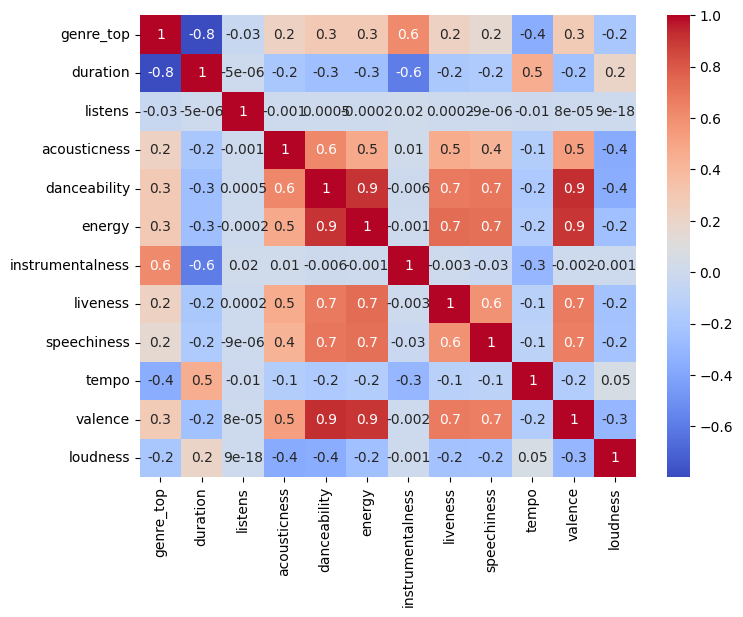

In [ ]:
# We first do a binary transformation of the genre_top column, in this case:
# Hip-Hop = 0
# Rock = 1
temp = pd.get_dummies(track_metrics['genre_top'])
df_two = pd.concat((temp, track_metrics), axis=1)
df_two = df_two.drop(["genre_top"], axis=1)
df_two = df_two.drop(["Hip-Hop"], axis=1)
track_metrics = df_two.rename(columns={"Rock": "genre_top"})

# Evaluate correlation
# Only take into account meaningful columns
meaningful_columns = ['genre_top', 'duration', 'listens', 'acousticness',
       'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness',
       'tempo', 'valence', 'loudness']

plt.figure(figsize=(8,6))
sns.heatmap(track_metrics[meaningful_columns].corr(), annot = True, fmt='.1g', cmap= 'coolwarm')

In [ ]:
# Compare every variable with each other
sns.pairplot(track_metrics[meaningful_columns], hue="genre_top", palette="hls")

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7f6dfac01900> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f6dfac00b80> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
def outliers(df, atribute):

    arr1 = df[atribute].values

    # Encontrar el 1st quartil
    q1 = np.quantile(arr1, 0.25)

    # Encontrar el 3rd quartil
    q3 = np.quantile(arr1, 0.75)

    # Encontrar el 2nd quartil
    med = np.median(arr1)

    # Encontrar el rango inter quartil (iqr)
    iqr = q3-q1

    # Encontrar los bigotes superior e inferior
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    outliers_l = arr1[(arr1 <= lower_bound)]
    outliers_u = arr1[(arr1 >= upper_bound)]



    outliers_l_p = (outliers_l.size/len(df[atribute]))*100
    outliers_u_p = (outliers_u.size/len(df[atribute]))*100


    if(outliers_l.size != 0):
      print('Lower outliers in {} represent {:.4f}% of data'.format(atribute,outliers_l_p))
      print('Lower outliers in {} : {}'.format(atribute,outliers_l))
    if(outliers_u.size != 0):
      print('Upper outliers in {} represent {:.4f}% of data'.format(atribute,outliers_u_p))
      print('Upper outliers in {} : {}'.format(atribute,outliers_u))

In [ ]:
# Revisar luego
#for col in meaningful_columns:
#  outliers(track_metrics, col)

Now we are going to train different models to try to find the model that gets the best accuracy.
Firts of all we select the target data, and the training data, then split them.

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 25}
Train Accuracy - : 0.950
Test Accuracy - : 0.948


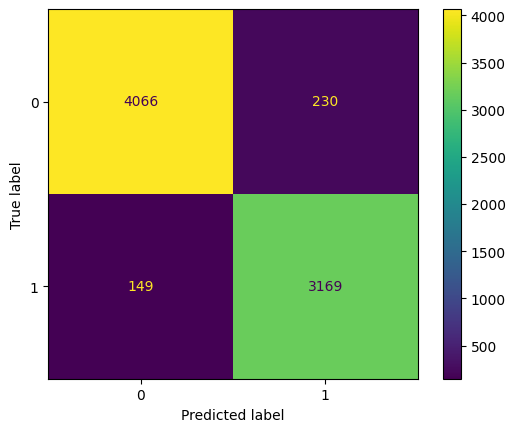

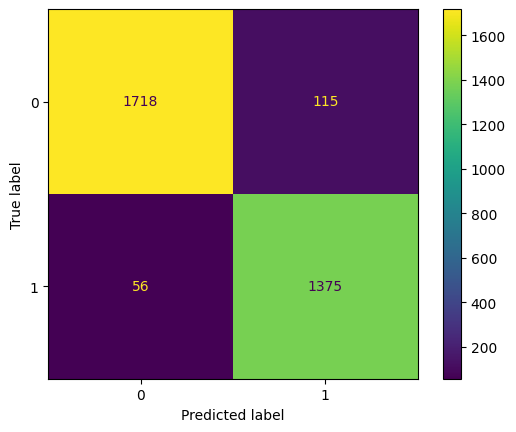

Accuracy score train: 0.9502232729183083
Precision score train: 0.9323330391291557
Recall score train: 0.9550934297769741
F1 score train: 0.9435760011910079
Accuracy score test: 0.9476102941176471
Precision score test: 0.9228187919463087
Recall score test: 0.9608665269042628
F1 score test: 0.9414584046559397


In [ ]:
#Random forest
#select target
y = track_metrics["genre_top"]

training_variables = [ 'acousticness',
       'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness',
       'tempo', 'valence', 'loudness']
#exclude target
x = track_metrics[training_variables]

#divide train, test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

#select criterion
criterion = ['gini', 'entropy']
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {  'criterion' : criterion,
                'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_Model = RandomForestClassifier()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
rf_Grid.fit(x_train, y_train)

#chek best hiperparameters
print(rf_Grid.best_params_)

#check accuracy
print(f'Train Accuracy - : {rf_Grid.score(x_train,y_train):.3f}')
print(f'Test Accuracy - : {rf_Grid.score(x_test,y_test):.3f}')

y_pred_train = rf_Grid.best_estimator_.predict(x_train)
y_pred_test = rf_Grid.best_estimator_.predict(x_test)

print("Confusion matrix for training data")
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print("Confusion matrix for testing data")
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print("Metrics for training data")
print("Accuracy score train:", accuracy_score(y_train, y_pred_train))
print("Precision score train:", precision_score(y_train, y_pred_train))
print("Recall score train:", recall_score(y_train, y_pred_train))
print("F1 score train:", f1_score(y_train, y_pred_train))

print("Metrics for testing data")
print("Accuracy score test:", accuracy_score(y_test, y_pred_test))
print("Precision score test:", precision_score(y_test, y_pred_test))
print("Recall score test:", recall_score(y_test, y_pred_test))
print("F1 score test:", f1_score(y_test, y_pred_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'var_smoothing': 0.5722367659350217}
Train Accuracy - : 0.641
Test Accuracy - : 0.641


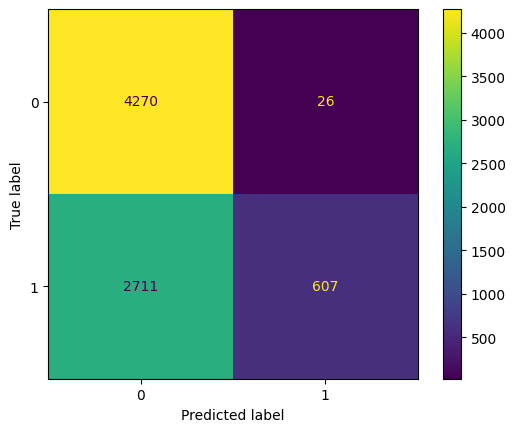

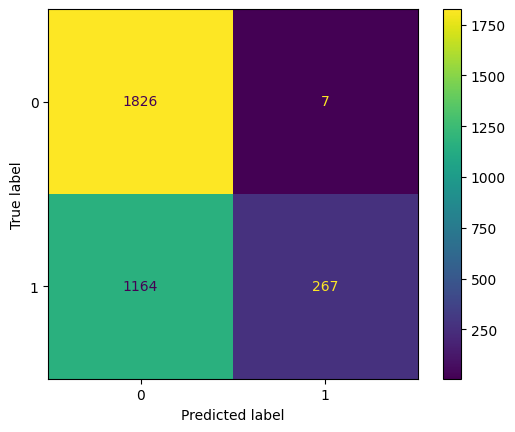

Accuracy score train: 0.6405306015235094
Precision score train: 0.9589257503949447
Recall score train: 0.18294153104279687
F1 score train: 0.3072639838015692
Accuracy score test: 0.6412377450980392
Precision score test: 0.9744525547445255
Recall score test: 0.18658280922431866
F1 score test: 0.3131964809384164


In [ ]:
#Naive bayes
param_grid_nb = {
    'var_smoothing': np.logspace(0,-12, num=100)
}
nb_Model = GaussianNB()
nb_Grid = GridSearchCV(estimator = nb_Model, param_grid = param_grid_nb, cv = 3, verbose=2, n_jobs = 4)
nb_Grid.fit(x_train, y_train)

#chek best hiperparameters
print(nb_Grid.best_params_)

#check accuracy
print(f'Train Accuracy - : {nb_Grid.score(x_train,y_train):.3f}')
print(f'Test Accuracy - : {nb_Grid.score(x_test,y_test):.3f}')

y_pred_train = nb_Grid.best_estimator_.predict(x_train)
y_pred_test = nb_Grid.best_estimator_.predict(x_test)

print("Confusion matrix for training data")
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print("Metrics for testing data")
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print("Metrics for training data")
print("Accuracy score train:", accuracy_score(y_train, y_pred_train))
print("Precision score train:", precision_score(y_train, y_pred_train))
print("Recall score train:", recall_score(y_train, y_pred_train))
print("F1 score train:", f1_score(y_train, y_pred_train))

print("Metrics for testing data")
print("Accuracy score test:", accuracy_score(y_test, y_pred_test))
print("Precision score test:", precision_score(y_test, y_pred_test))
print("Recall score test:", recall_score(y_test, y_pred_test))
print("F1 score test:", f1_score(y_test, y_pred_test))

Fitting 3 folds for each of 120 candidates, totalling 360 fits
{'C': 0.012742749857031334, 'max_iter': 1000, 'penalty': 'l2'}
Train Accuracy - : 0.841
Test Accuracy - : 0.851


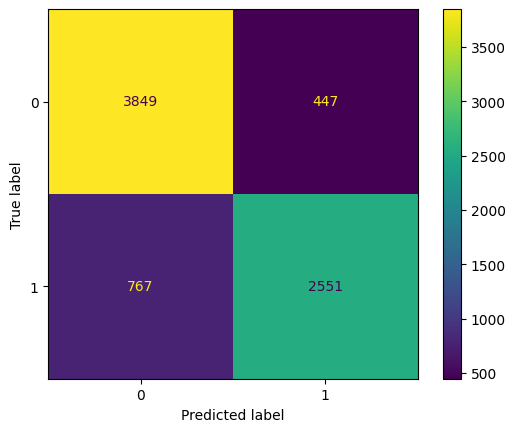

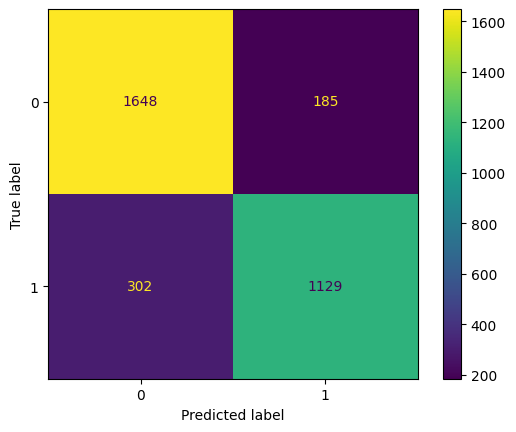

Accuracy score train: 0.8405568689256633
Precision score train: 0.8509006004002668
Recall score train: 0.768836648583484
F1 score train: 0.8077897403419887
Accuracy score test: 0.850796568627451
Precision score test: 0.8592085235920852
Recall score test: 0.7889587700908456
F1 score test: 0.8225865209471767


In [ ]:
#Logistic Regression
param_grid_lr={
    "C": np.logspace(-4, 4, 20),
    "penalty": ["none","l2"],
    "max_iter": [1000, 5000, 10000]
}
lr_Model = LogisticRegression(solver='lbfgs')
lr_Grid = GridSearchCV(estimator = lr_Model, param_grid = param_grid_lr, cv = 3, verbose=2, n_jobs = 4)
lr_Grid.fit(x_train, y_train)

#chek best hiperparameters
print(lr_Grid.best_params_)

#check accuracy
print(f'Train Accuracy - : {lr_Grid.score(x_train,y_train):.3f}')
print(f'Test Accuracy - : {lr_Grid.score(x_test,y_test):.3f}')

y_pred_train = lr_Grid.best_estimator_.predict(x_train)
y_pred_test = lr_Grid.best_estimator_.predict(x_test)

print("Confusion matrix for training data")
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print("Confusion matrix for testing data")
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print("Metrics for training data")
print("Accuracy score train:", accuracy_score(y_train, y_pred_train))
print("Precision score train:", precision_score(y_train, y_pred_train))
print("Recall score train:", recall_score(y_train, y_pred_train))
print("F1 score train:", f1_score(y_train, y_pred_train))

print("Metrics for testing data")
print("Accuracy score test:", accuracy_score(y_test, y_pred_test))
print("Precision score test:", precision_score(y_test, y_pred_test))
print("Recall score test:", recall_score(y_test, y_pred_test))
print("F1 score test:", f1_score(y_test, y_pred_test))

Fitting 3 folds for each of 240 candidates, totalling 720 fits
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5, 'p': 2}
Train Accuracy - : 0.954
Test Accuracy - : 0.934


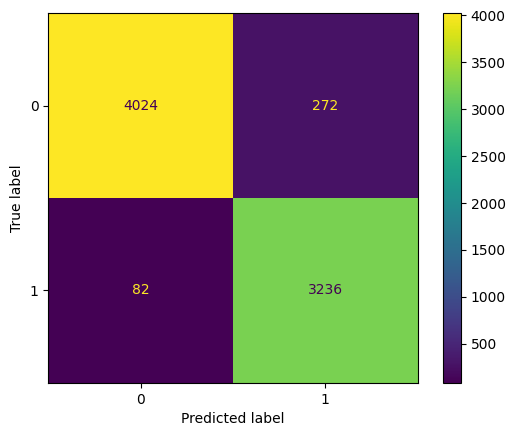

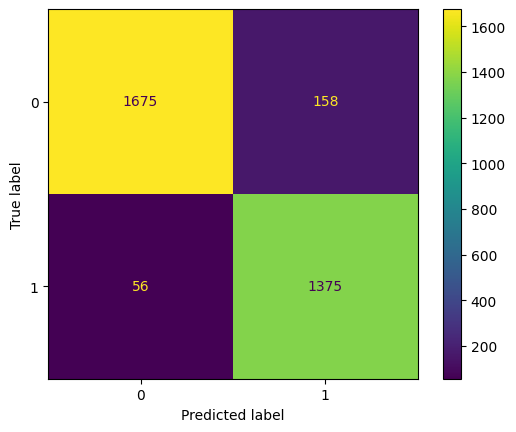

Accuracy score train: 0.9535066981875493
Precision score train: 0.9224629418472063
Recall score train: 0.9752863170584689
F1 score train: 0.9481394667447992
Accuracy score test: 0.9344362745098039
Precision score test: 0.8969341161121983
Recall score test: 0.9608665269042628
F1 score test: 0.9278002699055331


In [ ]:
 #knn
param_grid_knn = {
        'n_neighbors': [3, 5, 10, 12],
        'metric': ['minkowski', 'euclidean', 'manhattan'],
        'p': [2,5,7,9,10],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn_Model = KNeighborsClassifier()
knn_Grid = GridSearchCV(estimator = knn_Model, param_grid = param_grid_knn, cv = 3, verbose=2, n_jobs = 4)
knn_Grid.fit(x_train, y_train)

#chek best hiperparameters
print(knn_Grid.best_params_)

#check accuracy
print(f'Train Accuracy - : {knn_Grid.score(x_train,y_train):.3f}')
print(f'Test Accuracy - : {knn_Grid.score(x_test,y_test):.3f}')

y_pred_train = knn_Grid.best_estimator_.predict(x_train)
y_pred_test = knn_Grid.best_estimator_.predict(x_test)

print("Metrics for training data")
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print("Confusion matrix for testing data")
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print("Metrics for training data")
print("Accuracy score train:", accuracy_score(y_train, y_pred_train))
print("Precision score train:", precision_score(y_train, y_pred_train))
print("Recall score train:", recall_score(y_train, y_pred_train))
print("F1 score train:", f1_score(y_train, y_pred_train))

print("Metrics for testing data")
print("Accuracy score test:", accuracy_score(y_test, y_pred_test))
print("Precision score test:", precision_score(y_test, y_pred_test))
print("Recall score test:", recall_score(y_test, y_pred_test))
print("F1 score test:", f1_score(y_test, y_pred_test))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}
Train Accuracy - : 0.980
Test Accuracy - : 0.950


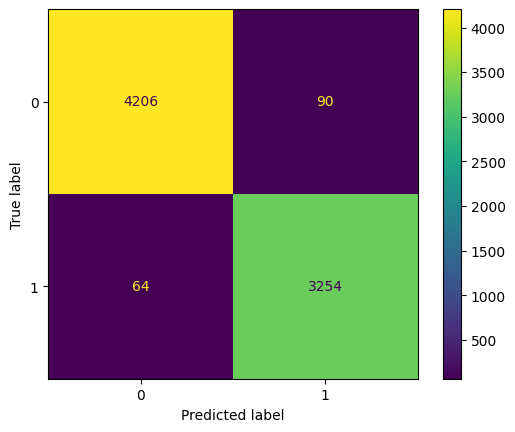

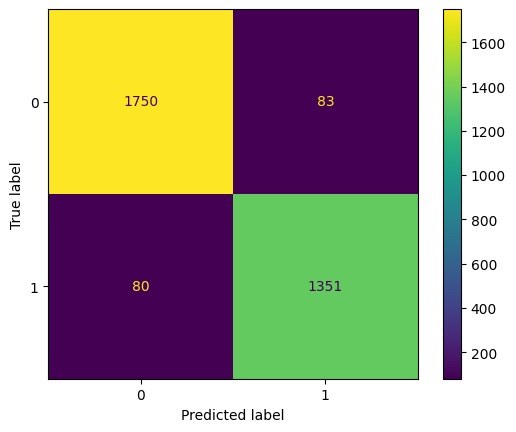

Accuracy score train: 0.9797741003414763
Precision score train: 0.9730861244019139
Recall score train: 0.9807112718505123
F1 score train: 0.9768838186730712
Accuracy score test: 0.9500612745098039
Precision score test: 0.9421199442119944
Recall score test: 0.944095038434661
F1 score test: 0.9431064572425829


In [ ]:
#decision tree
param_grid_dt = {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [5, 10, 20]
}
dt_Model = DecisionTreeClassifier()
dt_Grid = GridSearchCV(estimator = dt_Model, param_grid = param_grid_dt, cv = 3, verbose=2, n_jobs = 4)
dt_Grid.fit(x_train, y_train)

#chek best hiperparameters
print(dt_Grid.best_params_)

#check accuracy
print(f'Train Accuracy - : {dt_Grid.score(x_train,y_train):.3f}')
print(f'Test Accuracy - : {dt_Grid.score(x_test,y_test):.3f}')

y_pred_train = dt_Grid.best_estimator_.predict(x_train)
y_pred_test = dt_Grid.best_estimator_.predict(x_test)

print("Confusion matrix for training data")
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print("Confusion matrix for testing data")
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print("Metrics for training data")
print("Accuracy score train:", accuracy_score(y_train, y_pred_train))
print("Precision score train:", precision_score(y_train, y_pred_train))
print("Recall score train:", recall_score(y_train, y_pred_train))
print("F1 score train:", f1_score(y_train, y_pred_train))

print("Metrics for testing data")
print("Accuracy score test:", accuracy_score(y_test, y_pred_test))
print("Precision score test:", precision_score(y_test, y_pred_test))
print("Recall score test:", recall_score(y_test, y_pred_test))
print("F1 score test:", f1_score(y_test, y_pred_test))

The next table shows the comparison between the metrics of each model:

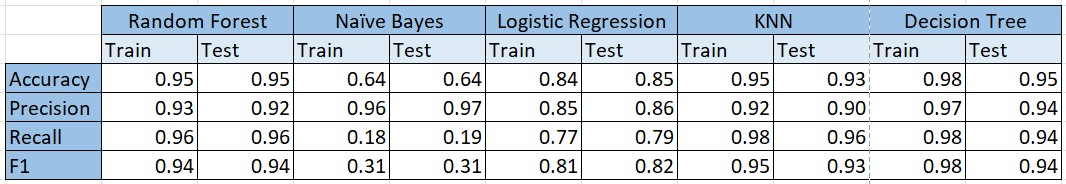

In [ ]:
#neural network
param_grid_nn = {
        "n_hidden": [1, 2, 5],
        "n_neurons": [50, 100, 300, 1000],
        "learning_rate": [0.01, 0.03, 0.05]
}
nn_Model = MLPClassifier()
nn_Grid = GridSearchCV(estimator = nn_Model, param_grid = param_grid_nn, cv = 3, verbose=2, n_jobs = 4)
nn_Grid.fit(x_train, y_train)

#chek best hiperparameters
print(nn_Grid.best_params_)

#check accuracy
print(f'Train Accuracy - : {nn_Grid.score(x_train,y_train):.3f}')
print(f'Test Accuracy - : {nn_Grid.score(x_test,y_test):.3f}')